In [2]:
import numpy as np
import os
import glob
from skimage import io
import matplotlib.pyplot as plt
from helper_function import print_yellow, print_green, print_red, generate_folder
import scipy.ndimage as ndimage

docker = False
dataset_dir='../data/minidataset/' if docker else './data/Phase_fluo_Cells/0_FUCCI_Timelapse/'

output_dir = '/home/sh38/Mask_RCNN/datasets/cell_cycle/'

phase_img_folder = dataset_dir+'f0_phase_cropped/'
fl1_img_folder = dataset_dir+'f0_fl1_cropped/'
fl2_img_folder = dataset_dir+'f0_fl2_cropped/'
combined_masks = dataset_dir+'f0_combined_masks/'

phase_img_files = glob.glob(phase_img_folder+'*.tif')
fl1_img_files = glob.glob(fl1_img_folder+'*.tif')
fl2_img_files = glob.glob(fl2_img_folder+'*.tif')
mask_files = glob.glob(combined_masks+'*.tif')

image_ids = []
for i in range(len(phase_img_files)):
    phase_img_file = phase_img_files[i]
    file_name = os.path.basename(phase_img_file)
    digit_str = file_name.split('_')[1][1:]
    if int(digit_str)<=25:
        image_ids.append(i)
print('The number of good examples: {}'.format(len(image_ids)))

print(len(phase_img_files)); print(len(fl1_img_files)); 
print(len(fl2_img_files));print(len(mask_files));

The number of good examples: 882
2441
2441
2441
2441
The 0-th image
./data/Phase_fluo_Cells/0_FUCCI_Timelapse/f0_combined_masks/m_f0_t0_i0_ch4_c0_r0_z1_mFL4.tif
./data/Phase_fluo_Cells/0_FUCCI_Timelapse/f0_combined_masks/m_f0_t0_i0_ch4_c0_r0_z1_mFL4.tif
Mask amount:56
340724
340724
[0 1 2 3]
[0 1 2 3]


Lossy conversion from float64 to uint8. Range [0.0, 3.0]. Convert image to uint8 prior to saving to suppress this warning.
/home/sh38/anaconda3/envs/proGAN_tf/lib/python3.6/site-packages/ipykernel_launcher.py:119: UserWarning: /home/sh38/Mask_RCNN/datasets/cell_cycle/0000/original_GT/0000.png is a low contrast image
/home/sh38/anaconda3/envs/proGAN_tf/lib/python3.6/site-packages/ipykernel_launcher.py:121: UserWarning: /home/sh38/Mask_RCNN/datasets/cell_cycle/0000/masks/mask_0000.png is a low contrast image
/home/sh38/anaconda3/envs/proGAN_tf/lib/python3.6/site-packages/ipykernel_launcher.py:121: UserWarning: /home/sh38/Mask_RCNN/datasets/cell_cycle/0000/masks/mask_0001.png is a low contrast image
/home/sh38/anaconda3/envs/proGAN_tf/lib/python3.6/site-packages/ipykernel_launcher.py:121: UserWarning: /home/sh38/Mask_RCNN/datasets/cell_cycle/0000/masks/mask_0002.png is a low contrast image
/home/sh38/anaconda3/envs/proGAN_tf/lib/python3.6/site-packages/ipykernel_launcher.py:121: UserWarni

/home/sh38/anaconda3/envs/proGAN_tf/lib/python3.6/site-packages/ipykernel_launcher.py:121: UserWarning: /home/sh38/Mask_RCNN/datasets/cell_cycle/0000/masks/mask_0041.png is a low contrast image
/home/sh38/anaconda3/envs/proGAN_tf/lib/python3.6/site-packages/ipykernel_launcher.py:121: UserWarning: /home/sh38/Mask_RCNN/datasets/cell_cycle/0000/masks/mask_0042.png is a low contrast image
/home/sh38/anaconda3/envs/proGAN_tf/lib/python3.6/site-packages/ipykernel_launcher.py:121: UserWarning: /home/sh38/Mask_RCNN/datasets/cell_cycle/0000/masks/mask_0043.png is a low contrast image
/home/sh38/anaconda3/envs/proGAN_tf/lib/python3.6/site-packages/ipykernel_launcher.py:121: UserWarning: /home/sh38/Mask_RCNN/datasets/cell_cycle/0000/masks/mask_0044.png is a low contrast image
/home/sh38/anaconda3/envs/proGAN_tf/lib/python3.6/site-packages/ipykernel_launcher.py:121: UserWarning: /home/sh38/Mask_RCNN/datasets/cell_cycle/0000/masks/mask_0045.png is a low contrast image
/home/sh38/anaconda3/envs/proG

Mask amount:7
17258
17258
[0 1 2]
[0 1 2]


/home/sh38/anaconda3/envs/proGAN_tf/lib/python3.6/site-packages/ipykernel_launcher.py:117: UserWarning: /home/sh38/Mask_RCNN/datasets/cell_cycle/0001/images/0001.png is a low contrast image
/home/sh38/anaconda3/envs/proGAN_tf/lib/python3.6/site-packages/ipykernel_launcher.py:118: UserWarning: /home/sh38/Mask_RCNN/datasets/cell_cycle/0001/GT/0001.png is a low contrast image
Lossy conversion from float64 to uint8. Range [0.0, 2.0]. Convert image to uint8 prior to saving to suppress this warning.
/home/sh38/anaconda3/envs/proGAN_tf/lib/python3.6/site-packages/ipykernel_launcher.py:119: UserWarning: /home/sh38/Mask_RCNN/datasets/cell_cycle/0001/original_GT/0001.png is a low contrast image
/home/sh38/anaconda3/envs/proGAN_tf/lib/python3.6/site-packages/ipykernel_launcher.py:121: UserWarning: /home/sh38/Mask_RCNN/datasets/cell_cycle/0001/masks/mask_0000.png is a low contrast image
/home/sh38/anaconda3/envs/proGAN_tf/lib/python3.6/site-packages/ipykernel_launcher.py:121: UserWarning: /home/sh

In [ ]:
def find_connected_neighbors(xc, yc, p_set):
    find_points = []
    for i in range(-1,2):
        for j in range(-1,2):
            if (xc+i, yc+j) in p_set and not (i==0 and j ==0):
                find_points.append((xc+i, yc+j))
    return find_points

for image_indx in range(2):
    # Load the map
    # 	image_indx=0;
    image_id = image_ids[image_indx]
    pha_file_name = os.path.basename(phase_img_files[image_id])
    mask_file_name = 'm_'+pha_file_name.replace('ch0', 'ch4').replace('mhilbert', 'mFL4')
    pha_img = io.imread(phase_img_folder+pha_file_name)
    map = io.imread(combined_masks+mask_file_name)
    if image_indx%10==0:
        print_yellow('The {}-th image'.format(image_indx))
        print_yellow(mask_files[image_id])
        print_green(combined_masks+mask_file_name)
    # 	map = io.imread(mask_files[image_id])
    mask_list = []

    # Generate the edge masks for all objects
    uni_values = np.unique(map)
    for cls_indx in range(1,len(uni_values)):
        map_layer = map == uni_values[cls_indx]
        mask_ext = np.zeros([map_layer.shape[0]+2, map_layer.shape[1]+2])
        shp = map_layer.shape
        mask_ext[1:-1,1:-1] = map_layer
        masks = np.zeros(map_layer.shape+(9,))
        for i in range(-1,2):
            for j in range(-1,2):
                masks[:,:,(i+1)*3+(j+1)]= mask_ext[i+1:i+shp[0]+1,j+1:j+shp[1]+1]
        edge_mask = np.logical_and(np.sum(masks, axis = 2) < 9, np.sum(masks, axis = 2) >0)*map_layer
        fill_mask = ndimage.morphology.binary_fill_holes(edge_mask)

        # Generate the edge mask for each object individually
        xs, ys = np.where(edge_mask>0)
        point_set = set()
        for i in range(xs.shape[0]):
            point_set.add((xs[i],ys[i]))

        obj_list=[]; cur_obj=set(); obj_list.append(cur_obj)
        xc, yc = point_set.pop()
        to_check_q = []; to_check_q.append((xc,yc))
        while(len(point_set)>0 or len(to_check_q)>0):
            while(len(to_check_q)>0):
                xc, yc = to_check_q.pop(0)
                cur_obj.add((xc,yc))
                neighbors = find_connected_neighbors(xc, yc, point_set)
                if len(neighbors)>0:
                    to_check_q = to_check_q +neighbors
                    point_set = point_set - set(neighbors)
            if len(point_set)>0:
                cur_obj=set(); obj_list.append(cur_obj); xc, yc = point_set.pop()
                to_check_q = []; to_check_q.append((xc,yc))

        # Fill the hole to get the mask for each object
        for i in range(len(obj_list)):
            mask = np.zeros(map.shape)
            for xy_tuple in list(obj_list[i]):
                mask[xy_tuple]=1
            mask = ndimage.morphology.binary_fill_holes(mask)
            mask_list.append(mask) ## add to the mask list

    # Check the mask
    bin_map = map > 0; 
    recon_mask =np.zeros(bin_map.shape); print('Mask amount:{}'.format(len(mask_list)))
    for i in range(len(mask_list)):
        if np.sum(mask_list[i])>500:
            recon_mask = recon_mask + mask_list[i]*map
    print_green(np.sum(map)); print_red(np.sum(np.uint8(recon_mask)))
    print_green(np.unique(map)); print_red(np.unique(np.uint8(recon_mask)))

    # Save images and masks
    rgb_pha_img = np.uint8(255*(pha_img-np.min(pha_img))/(np.max(pha_img)-np.min(pha_img)))
    rgb_pha_img = np.concatenate([rgb_pha_img.reshape(rgb_pha_img.shape+(1,)), rgb_pha_img.reshape(rgb_pha_img.shape+(1,)), rgb_pha_img.reshape(rgb_pha_img.shape+(1,))], axis =2)
    data_folder = os.path.join(output_dir, '{:04d}'.format(image_indx)); new_image_id = '{:04d}'.format(image_indx)
    generate_folder(data_folder+'/images'); generate_folder(data_folder+'/masks'); generate_folder(data_folder+'/GT')
    generate_folder(data_folder+'/original_GT')
    io.imsave(data_folder+'/images/{}.png'.format(new_image_id),rgb_pha_img)
    io.imsave(data_folder+'/GT/{}.png'.format(new_image_id),recon_mask)
    io.imsave(data_folder+'/original_GT/{}.png'.format(new_image_id),map)
    for i in range(len(mask_list)):
        io.imsave(data_folder+'/masks/mask_{:04d}.png'.format(i),mask_list[i]*map)

In [1]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    fig, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    fig.tight_layout()
    SMALL_SIZE = 24
    MEDIUM_SIZE = 24
    BIGGER_SIZE = 24

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    return fig, ax

1274


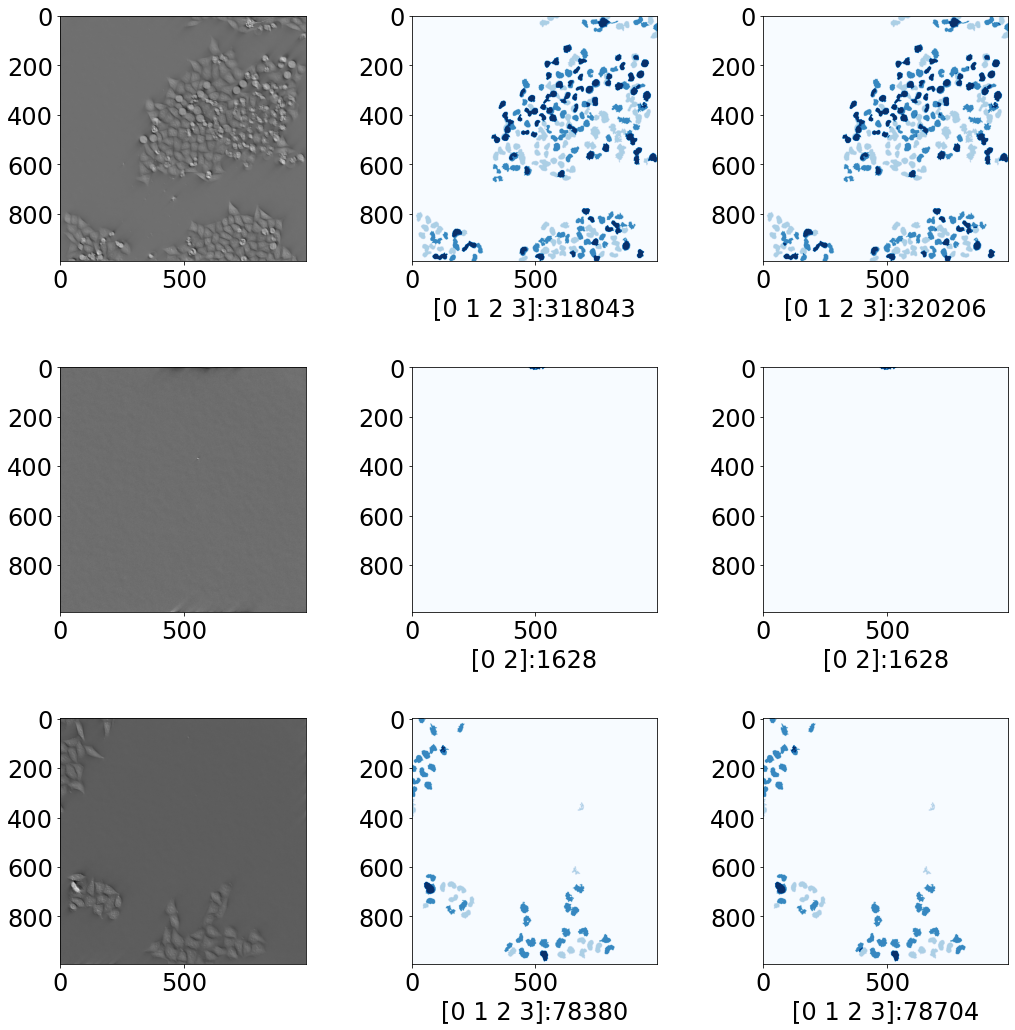

In [11]:
import numpy as np
import os
import glob
from skimage import io
import matplotlib.pyplot as plt
from helper_function import print_yellow, print_green, print_red, generate_folder
import scipy.ndimage as ndimage
output_dataset_folder = '/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/'
image_folders = glob.glob(output_dataset_folder+'/*')
# print(image_folders); 
print(len(image_folders))
nb_images = 3
_, ax = get_ax(rows = nb_images, cols = 3, size = 5)
image_ids = np.random.randint(0,len(image_folders),nb_images)
for i in range(len(image_ids)):
    image_id ='{:04d}'.format(image_ids[i])
    pha_img = io.imread(output_dataset_folder+'{}/images/{}.png'.format(image_id, image_id))
    gt_map = io.imread(output_dataset_folder+'{}/GT/{}.png'.format(image_id, image_id))
    original_map = io.imread(output_dataset_folder+'{}/original_GT/{}.png'.format(image_id, image_id))
    ax[i,0].imshow(pha_img); ax[i,1].imshow(gt_map, cmap='Blues'); ax[i,2].imshow(original_map, cmap ='Blues')
    ax[i,1].set_xlabel('{}:{}'.format(np.unique(gt_map),np.sum(gt_map))); 
    ax[i,2].set_xlabel('{}:{}'.format(np.unique(original_map), np.sum(original_map)))

In [26]:
output_dataset_folder = '/home/sh38/Mask_RCNN/datasets/cell_cycle/train/'
image_folders = glob.glob(output_dataset_folder+'/*')
# print(image_folders); 
print(len(image_folders))
nb_images = len(image_folders)
# _, ax = get_ax(rows = nb_images, cols = 3, size = 5)
# image_ids = np.random.randint(0,len(image_folders),nb_images)
image_list = []
for i in range(nb_images):
    image_id = os.path.basename(image_folders[i])
    pha_img = io.imread(output_dataset_folder+'{}/images/{}.png'.format(image_id, image_id))
    image_list.append(pha_img)

image_arr = np.stack(image_list)
print(image_arr.shape)
print("Mean:{:.4f}".format(np.mean(image_arr[:,:,0])))
#     gt_map = io.imread(output_dataset_folder+'{}/GT/{}.png'.format(image_id, image_id))
#     original_map = io.imread(output_dataset_folder+'{}/original_GT/{}.png'.format(image_id, image_id))
#     ax[i,0].imshow(pha_img); ax[i,1].imshow(gt_map, cmap='Blues'); ax[i,2].imshow(original_map, cmap ='Blues')

682
(682, 1984, 1984, 3)
Mean:110.7761


In [12]:
output_dataset_folder = '/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/'
image_folders = glob.glob(output_dataset_folder+'/*')
print(len(image_folders))
permut_indices = np.random.permutation(range(len(image_folders)))
# print(permut_indices);
print(len(permut_indices))
val_indices = permut_indices[:100]
test_indices = permut_indices[100:200]
train_indices = permut_indices[200:]


print('Number of samples: train {}, val {}, test {}'.format(len(train_indices), len(val_indices), len(test_indices)))

## save the train images
for index in train_indices:
    image_folder = image_folders[index]
    train_folder = os.path.dirname(image_folder).replace('all_data','train')
    print(image_folder);print(train_folder)
    if os.path.exists(image_folder):
        os.system('cp -rf {} {}'.format(image_folder,train_folder))

## save the val images
for index in val_indices:
    image_folder = image_folders[index]
    val_folder = os.path.dirname(image_folder).replace('all_data','val')
    print(image_folder);print(val_folder)
    if os.path.exists(image_folder):
        os.system('cp -rf {} {}'.format(image_folder,val_folder))

## save the test images
for index in test_indices:
    image_folder = image_folders[index]
    test_folder = os.path.dirname(image_folder).replace('all_data','test')
    print(image_folder);print(train_folder)
    if os.path.exists(image_folder):
        os.system('cp -rf {} {}'.format(image_folder,test_folder))

val_dataset_folder = '/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/val/'
test_dataset_folder = '/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/test/'
train_dataset_folder = '/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train/'
train_image_folders = glob.glob(train_dataset_folder+'/*')
val_image_folders = glob.glob(val_dataset_folder+'/*')
test_image_folders = glob.glob(test_dataset_folder+'/*')
print('number: train {}, val {}, test {}'.format(len(train_image_folders), len(val_image_folders), len(test_image_folders)))

1274
1274
Number of samples: train 1074, val 100, test 100
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0597
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/1068
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0400
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/1123
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0617
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/1007
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0974
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0946
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets

/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0202
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0810
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0520
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0657
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0886
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0582
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0412
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0942
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0249
/home/sh38/Mask_RCNN/datase

/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0107
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0654
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/1099
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0765
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/1161
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0338
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/1084
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0922
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/1022
/home/sh38/Mask_RCNN/datase

/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0783
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0219
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0980
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0698
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0632
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0293
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0163
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0794
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/1247
/home/sh38/Mask_RCNN/datase

/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/1046
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/1143
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0888
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/1141
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0294
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0232
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0899
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0109
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0515
/home/sh38/Mask_RCNN/datase

/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/1241
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/1036
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0606
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/1171
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0822
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/1208
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/1272
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0029
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/1239
/home/sh38/Mask_RCNN/datase

/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0722
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/1077
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0004
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0544
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0686
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0051
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0749
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0169
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0290
/home/sh38/Mask_RCNN/datase

/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0289
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0625
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0726
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0478
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0465
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0316
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0799
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0071
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0829
/home/sh38/Mask_RCNN/datase

/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0129
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0611
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0252
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0871
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0486
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0789
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0234
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0865
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0740
/home/sh38/Mask_RCNN/datase

/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0224
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0603
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0329
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0229
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0581
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0795
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0707
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/1035
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/1246
/home/sh38/Mask_RCNN/datase

/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0023
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0216
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0172
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0365
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/1086
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0193
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0814
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0919
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/1087
/home/sh38/Mask_RCNN/datase

/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0982
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0271
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0861
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/1154
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/1259
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0361
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0845
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0744
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/1224
/home/sh38/Mask_RCNN/datase

/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0796
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0519
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0241
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0099
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/1001
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/1082
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0863
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/1132
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0217
/home/sh38/Mask_RCNN/datase

/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0292
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0667
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/1006
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0014
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0337
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/1150
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0815
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0557
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0312
/home/sh38/Mask_RCNN/datase

/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0927
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0147
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0038
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0111
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0425
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/1038
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/1262
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/1222
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0824
/home/sh38/Mask_RCNN/datase

/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0427
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/val
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0890
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/val
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0013
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/val
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/1155
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/val
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/1258
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/val
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0489
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/val
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0260
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/val
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0327
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/val
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0818
/home/sh38/Mask_RCNN/datasets/cell_cycle_do

/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0777
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/val
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/1248
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/val
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0647
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/val
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0745
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/val
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0484
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/val
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0727
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/val
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0758
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/val
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/1113
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/val
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/1002
/home/sh38/Mask_RCNN/datasets/cell_cycle_do

/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0449
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0884
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0459
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/1209
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0159
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0916
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0844
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/1028
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/train
/home/sh38/Mask_RCNN/datasets/cell_cycle_down2/all_data/0668
/home/sh38/Mask_RCNN/datase

In [13]:
train_dataset_folder = '/home/sh38/Mask_RCNN/datasets/cell_cycle2/train/'
val_dataset_folder = '/home/sh38/Mask_RCNN/datasets/cell_cycle2/val/'
test_dataset_folder = '/home/sh38/Mask_RCNN/datasets/cell_cycle2/test/'
train_image_folders = glob.glob(train_dataset_folder+'/*')
val_image_folders = glob.glob(val_dataset_folder+'/*')
test_image_folders = glob.glob(test_dataset_folder+'/*')
print('number: train {}, val {}, test {}'.format(len(train_image_folders), len(val_image_folders), len(test_image_folders)))

## copy data to the segmentation model folder
segmentation_data_folder = '/home/sh38/segmentation_models/phase_cells/data/cell_cycle2/'
# train
images_folder = segmentation_data_folder+'train_images/'; masks_folder = segmentation_data_folder+'train_masks/'
print(images_folder); print(masks_folder)
for img_folder in train_image_folders:
#     img_folder = train_image_folders[0]
    img_id = os.path.basename(img_folder)
    image_file = img_folder+'/images/{}.png'.format(img_id); mask_file = img_folder+'/original_GT/{}.png'.format(img_id)
    #print(image_file); print(mask_file)
    # _, ax = get_ax(1,2,5); ax[0].imshow(io.imread(image_file)); ax[1].imshow(io.imread(mask_file))
    os.system('cp {} {}'.format(image_file, images_folder))
    os.system('cp {} {}'.format(mask_file, masks_folder))

trn_img_files = glob.glob(images_folder+'*.png'); trn_mask_files = glob.glob(masks_folder+'*.png');
print('target: train image {} masks {}'.format(len(trn_img_files), len(trn_mask_files)))
# print(train_image_folders)
# val
images_folder = segmentation_data_folder+'val_images/'; masks_folder = segmentation_data_folder+'val_masks/'
print(images_folder); print(masks_folder)
for img_folder in val_image_folders:
#     img_folder = train_image_folders[0]
    img_id = os.path.basename(img_folder)
    image_file = img_folder+'/images/{}.png'.format(img_id); mask_file = img_folder+'/original_GT/{}.png'.format(img_id)
    #print(image_file); print(mask_file)
    # _, ax = get_ax(1,2,5); ax[0].imshow(io.imread(image_file)); ax[1].imshow(io.imread(mask_file))
    os.system('cp {} {}'.format(image_file, images_folder))
    os.system('cp {} {}'.format(mask_file, masks_folder))
val_img_files = glob.glob(images_folder+'*.png'); val_mask_files = glob.glob(masks_folder+'*.png');
print('target: val image {} masks {}'.format(len(val_img_files), len(val_mask_files)))
# test
images_folder = segmentation_data_folder+'test_images/'; masks_folder = segmentation_data_folder+'test_masks/'
print(images_folder); print(masks_folder)
for img_folder in test_image_folders:
#     img_folder = train_image_folders[0]
    img_id = os.path.basename(img_folder)
    image_file = img_folder+'/images/{}.png'.format(img_id); mask_file = img_folder+'/original_GT/{}.png'.format(img_id)
    #print(image_file); print(mask_file)
    # _, ax = get_ax(1,2,5); ax[0].imshow(io.imread(image_file)); ax[1].imshow(io.imread(mask_file))
    os.system('cp {} {}'.format(image_file, images_folder))
    os.system('cp {} {}'.format(mask_file, masks_folder))
test_img_files = glob.glob(images_folder+'*.png'); test_mask_files = glob.glob(masks_folder+'*.png');
print('target: test image {} masks {}'.format(len(test_img_files), len(test_mask_files)))

number: train 1074, val 100, test 100
/home/sh38/segmentation_models/phase_cells/data/cell_cycle2/train_images/
/home/sh38/segmentation_models/phase_cells/data/cell_cycle2/train_masks/
target: train image 1074 masks 1074
/home/sh38/segmentation_models/phase_cells/data/cell_cycle2/val_images/
/home/sh38/segmentation_models/phase_cells/data/cell_cycle2/val_masks/
target: val image 100 masks 100
/home/sh38/segmentation_models/phase_cells/data/cell_cycle2/test_images/
/home/sh38/segmentation_models/phase_cells/data/cell_cycle2/test_masks/
target: test image 100 masks 100


In [16]:
## delete the images with employ masks
train_dataset_folder = '/home/sh38/Mask_RCNN/datasets/cell_cycle2/train/'
val_dataset_folder = '/home/sh38/Mask_RCNN/datasets/cell_cycle2/val/'
test_dataset_folder = '/home/sh38/Mask_RCNN/datasets/cell_cycle2/test/'
train_image_folders = glob.glob(train_dataset_folder+'/*')
val_image_folders = glob.glob(val_dataset_folder+'/*')
test_image_folders = glob.glob(test_dataset_folder+'/*')
print('number: train {}, val {}, test {}'.format(len(train_image_folders), len(val_image_folders), len(test_image_folders)))

for img_folder in train_image_folders:
#     img_folder = train_image_folders[0]
    img_id = os.path.basename(img_folder)
    mask_files = glob.glob(img_folder+'/masks/*.png')
    if len(mask_files) ==0:
        print('Delete:{}'.format(img_folder))
        os.system('rm -rf {}'.format(img_folder))

trn_img_files = glob.glob(images_folder+'*.png'); trn_mask_files = glob.glob(masks_folder+'*.png');
print('target: train image {} masks {}'.format(len(trn_img_files), len(trn_mask_files)))
# print(train_image_folders)
# val
images_folder = segmentation_data_folder+'val_images/'; masks_folder = segmentation_data_folder+'val_masks/'
print(images_folder); print(masks_folder)
for img_folder in val_image_folders:
    img_id = os.path.basename(img_folder)
    mask_files = glob.glob(img_folder+'/masks/*.png')
    if len(mask_files) ==0:
        print('Delete:{}'.format(img_folder))
        os.system('rm -rf {}'.format(img_folder))

# test
images_folder = segmentation_data_folder+'test_images/'; masks_folder = segmentation_data_folder+'test_masks/'
print(images_folder); print(masks_folder)
for img_folder in test_image_folders:
    img_id = os.path.basename(img_folder)
    mask_files = glob.glob(img_folder+'/masks/*.png')
    if len(mask_files) ==0:
        print('Delete:{}'.format(img_folder))
        os.system('rm -rf {}'.format(img_folder))

train_dataset_folder = '/home/sh38/Mask_RCNN/datasets/cell_cycle2/train/'
val_dataset_folder = '/home/sh38/Mask_RCNN/datasets/cell_cycle2/val/'
test_dataset_folder = '/home/sh38/Mask_RCNN/datasets/cell_cycle2/test/'
train_image_folders = glob.glob(train_dataset_folder+'/*')
val_image_folders = glob.glob(val_dataset_folder+'/*')
test_image_folders = glob.glob(test_dataset_folder+'/*')
print('number: train {}, val {}, test {}'.format(len(train_image_folders), len(val_image_folders), len(test_image_folders)))

number: train 1074, val 100, test 100
Delete:/home/sh38/Mask_RCNN/datasets/cell_cycle2/train/0019
target: train image 100 masks 100
/home/sh38/segmentation_models/phase_cells/data/cell_cycle2/val_images/
/home/sh38/segmentation_models/phase_cells/data/cell_cycle2/val_masks/
/home/sh38/segmentation_models/phase_cells/data/cell_cycle2/test_images/
/home/sh38/segmentation_models/phase_cells/data/cell_cycle2/test_masks/
number: train 1073, val 100, test 100


In [3]:
train_dataset_folder = '/home/sh38/Mask_RCNN/datasets/phase_cells/train/'
val_dataset_folder = '/home/sh38/Mask_RCNN/datasets/phase_cells/val/'
test_dataset_folder = '/home/sh38/Mask_RCNN/datasets/phase_cells/test/'
train_image_folders = glob.glob(train_dataset_folder+'/*')
val_image_folders = glob.glob(val_dataset_folder+'/*')
test_image_folders = glob.glob(test_dataset_folder+'/*')
print('number: train {}, val {}, test {}'.format(len(train_image_folders), len(val_image_folders), len(test_image_folders)))

## copy data to the segmentation model folder
segmentation_data_folder = '/home/sh38/segmentation_models/phase_cells/data/live_dead/'
# train
images_folder = segmentation_data_folder+'train_images/'; masks_folder = segmentation_data_folder+'train_masks/'
print(images_folder); print(masks_folder)
for img_folder in train_image_folders:
#     img_folder = train_image_folders[0]
    img_id = os.path.basename(img_folder)
    image_file = img_folder+'/images/{}.png'.format(img_id); mask_file = img_folder+'/GT/{}.png'.format(img_id)
    #print(image_file); print(mask_file)
    # _, ax = get_ax(1,2,5); ax[0].imshow(io.imread(image_file)); ax[1].imshow(io.imread(mask_file))
    os.system('cp {} {}'.format(image_file, images_folder))
    os.system('cp {} {}'.format(mask_file, masks_folder))

trn_img_files = glob.glob(images_folder+'*.png'); trn_mask_files = glob.glob(masks_folder+'*.png');
print('target: train image {} masks {}'.format(len(trn_img_files), len(trn_mask_files)))
# print(train_image_folders)
# val
images_folder = segmentation_data_folder+'val_images/'; masks_folder = segmentation_data_folder+'val_masks/'
print(images_folder); print(masks_folder)
for img_folder in val_image_folders:
#     img_folder = train_image_folders[0]
    img_id = os.path.basename(img_folder)
    image_file = img_folder+'/images/{}.png'.format(img_id); mask_file = img_folder+'/GT/{}.png'.format(img_id)
    #print(image_file); print(mask_file)
    # _, ax = get_ax(1,2,5); ax[0].imshow(io.imread(image_file)); ax[1].imshow(io.imread(mask_file))
    os.system('cp {} {}'.format(image_file, images_folder))
    os.system('cp {} {}'.format(mask_file, masks_folder))
val_img_files = glob.glob(images_folder+'*.png'); val_mask_files = glob.glob(masks_folder+'*.png');
print('target: val image {} masks {}'.format(len(val_img_files), len(val_mask_files)))
# test
images_folder = segmentation_data_folder+'test_images/'; masks_folder = segmentation_data_folder+'test_masks/'
print(images_folder); print(masks_folder)
for img_folder in test_image_folders:
#     img_folder = train_image_folders[0]
    img_id = os.path.basename(img_folder)
    image_file = img_folder+'/images/{}.png'.format(img_id); mask_file = img_folder+'/GT/{}.png'.format(img_id)
    #print(image_file); print(mask_file)
    # _, ax = get_ax(1,2,5); ax[0].imshow(io.imread(image_file)); ax[1].imshow(io.imread(mask_file))
    os.system('cp {} {}'.format(image_file, images_folder))
    os.system('cp {} {}'.format(mask_file, masks_folder))
test_img_files = glob.glob(images_folder+'*.png'); test_mask_files = glob.glob(masks_folder+'*.png');
print('target: test image {} masks {}'.format(len(test_img_files), len(test_mask_files)))


number: train 899, val 199, test 99
/home/sh38/segmentation_models/phase_cells/data/live_dead/train_images/
/home/sh38/segmentation_models/phase_cells/data/live_dead/train_masks/
target: train image 899 masks 899
/home/sh38/segmentation_models/phase_cells/data/live_dead/val_images/
/home/sh38/segmentation_models/phase_cells/data/live_dead/val_masks/
target: val image 199 masks 199
/home/sh38/segmentation_models/phase_cells/data/live_dead/test_images/
/home/sh38/segmentation_models/phase_cells/data/live_dead/test_masks/
target: test image 99 masks 99


number: train 1074, val 100, test 100
/home/sh38/segmentation_models/phase_cells/data/cell_cycle2/train_images/
/home/sh38/segmentation_models/phase_cells/data/cell_cycle2/train_masks/
[0 1 2 3]


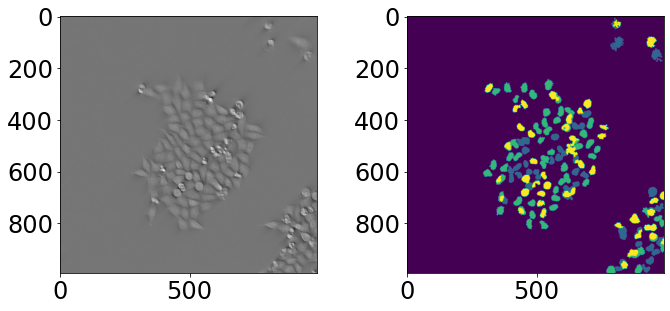

In [14]:
train_dataset_folder = '/home/sh38/Mask_RCNN/datasets/cell_cycle2/train/'
val_dataset_folder = '/home/sh38/Mask_RCNN/datasets/cell_cycle2/val/'
test_dataset_folder = '/home/sh38/Mask_RCNN/datasets/cell_cycle2/test/'
train_image_folders = glob.glob(train_dataset_folder+'/*')
val_image_folders = glob.glob(val_dataset_folder+'/*')
test_image_folders = glob.glob(test_dataset_folder+'/*')
print('number: train {}, val {}, test {}'.format(len(train_image_folders), len(val_image_folders), len(test_image_folders)))

## copy data to the segmentation model folder
segmentation_data_folder = '/home/sh38/segmentation_models/phase_cells/data/cell_cycle2/'
# train
images_folder = segmentation_data_folder+'train_images/'; masks_folder = segmentation_data_folder+'train_masks/'
print(images_folder); print(masks_folder)
# for img_folder in train_image_folders:
img_folder = train_image_folders[0]
img_id = os.path.basename(img_folder)
image_file = img_folder+'/images/{}.png'.format(img_id); mask_file = img_folder+'/GT/{}.png'.format(img_id)
_, ax = get_ax(1,2,5); ax[0].imshow(io.imread(image_file)); ax[1].imshow(io.imread(mask_file))
print(np.unique(io.imread(mask_file)))